# Useful function

In [13]:
from copy import deepcopy
def fineNotMatch(list1: list, list2: list) -> list:
    """
    return: list of elements that dosen't match
    """
    if len(list1)>len(list2):
        Llist, Slist = list1, list2
    else:
        Llist, Slist = list2, list1

    flag = False
    result = []
    for elem in Llist:
        for i in range(len(Slist)):
            if Slist[i] == elem:
                flag = True
                del Slist[i]
                break
        if flag == False:
            result.append(elem)
        flag = False

    return result

In [14]:
import numpy as np
from typing import *
import cv2
from skimage import io, color
import matplotlib.pyplot as plt

def overlay(
    image: np.ndarray,
    mask: np.ndarray,
    # color: Tuple[int, int, int] = (255,0,0),
    alpha: float = 0.5,
    resize: Tuple[int, int] = (512,512)
) -> np.ndarray:
    """
    return the image with segmentation masks 
    """
    if len(image.shape) == 2:   # gray color
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    # if image.shape[-1] == min(image.shape):
    #     image = image.transpose(2,0,1)

    return color.label2rgb(mask,image)
    # color = np.asarray(color).reshape(3,1,1)
    # colored_mask = np.expand_dims(mask, 0).repeat(3, axis=0)
    # masked = np.ma.MaskedArray(image, mask=colored_mask, fill_value=color)
    # image_overlay = masked.filled()

    # if resize is not None:
    #     image = cv2.resize(image.transpose(1,2,0), resize)
    #     image_overlay = cv2.resize(image_overlay.transpose(1,2,0), resize)
    
    # image_combined = cv2.addWeighted(image, 1-alpha, image_overlay, alpha, 0)
    # return image_combined
        

In [10]:
import os
list1 = os.listdir("/home/ljj0512/private/workspace/Medical/segmentation/data/segmentation/MSD/Task09_Spleen/labelsTr")
new_list = filter(lambda x: not x.startswith("._"), list1)
print(len(tuple(new_list)))

41


# BTCV

In [28]:
import os

test_path = "/home/ljj0512/shared/hdd_ext/nvme1/medical/segmentation/BTCV/Abdomen/RawData/imagesTs"
train_path = "/home/ljj0512/shared/hdd_ext/nvme1/medical/segmentation/BTCV/Abdomen/RawData/imagesTr"
trainlabel_path = "/home/ljj0512/shared/hdd_ext/nvme1/medical/segmentation/BTCV/Abdomen/RawData/labelsTr"

test_dir = os.listdir(test_path)
print(len(test_dir))
train_dir = os.listdir(train_path)
print(len(train_dir))
trainlabel_dir = os.listdir(trainlabel_path)
print(len(trainlabel_dir))

20
30
30


In [29]:
result = fineNotMatch(
    list(map(lambda x: x.split("img")[-1], train_dir)), 
    list(map(lambda x: x.split("label")[-1], trainlabel_dir))
)
print("not matched list:",result)

NameError: name 'fineNotMatch' is not defined

In [62]:
# MRI 영상 등을 표현할 때 주자 쓰이는 NifTI 형식의 파일(.nii.gz)을 다룰 때에는 쓰이는 패키지
import nibabel as nib

idx = 1
print("train label:",trainlabel_dir[idx])
labelProxy = nib.load(os.path.join(trainlabel_path, trainlabel_dir[0]))
labelHeader = labelProxy.header

id = trainlabel_dir[idx].split("label")[-1]
for i in range(len(train_dir)):
    if train_dir[i].split("img")[-1].startswith(id):
        break

print("train:",train_dir[i])
trainProxy = nib.load(os.path.join(train_path, train_dir[i]))
trainHeader = trainProxy.header

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


train label: label0030.nii.gz
2023-01-04 12:00:27,186 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


train: img0030.nii.gz
2023-01-04 12:00:27,190 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


In [101]:
print(trainHeader)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512 153   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.        0.7421875 0.7421875 3.        0.        0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 1464
glmin           : -1024
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.

In [102]:
labelarr = labelProxy.get_fdata()
print(type(labelarr))
print(labelarr.shape)
print("-"*50)

trainarr = trainProxy.get_fdata()
print(type(trainarr))
print(trainarr.shape)
# sub_arr = proxy.dataobj[..., 0:5]
# print(sub_arr.shape)

<class 'numpy.ndarray'>
(512, 512, 144)
--------------------------------------------------
<class 'numpy.ndarray'>
(512, 512, 153)


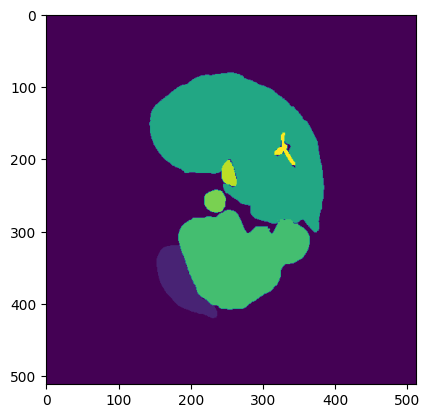

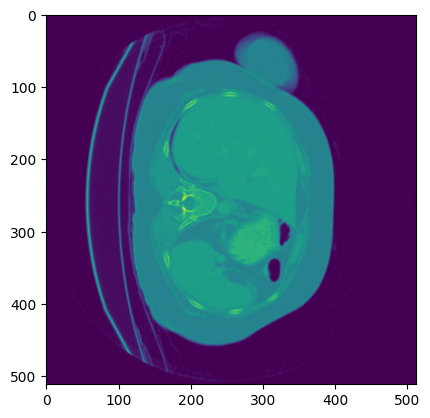

In [32]:
import matplotlib.pyplot as plt

idx = 120
plt.imshow(labelarr[..., idx])
plt.show()

idx = 75
plt.imshow(trainarr[..., idx])
plt.show()

/tmp/ipykernel_55580/2515560859.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


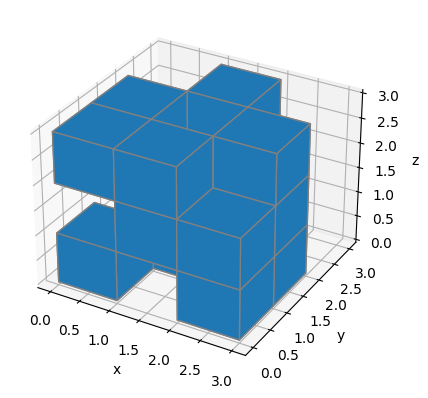

In [73]:
from mpl_toolkits.mplot3d import Axes3D
def make_ax(grid=False):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.grid(grid)
    return ax

filled = np.array([
    [[1, 0, 1], [0, 0, 1], [0, 1, 0]],
    [[0, 1, 1], [1, 0, 0], [1, 0, 1]],
    [[1, 1, 0], [1, 1, 1], [0, 0, 0]]
])

ax = make_ax(True)
ax.voxels(filled, edgecolors='gray', shade=False)
plt.show()

In [32]:
import matplotlib.pyplot as plt

new_idx = int((trainarr.shape[-1]/labelarr.shape[-1]) * idx)
print(new_idx)
temp_img = trainarr[..., new_idx]
plt.imshow(temp_img, cmap="gray")
plt.show()
print(temp_img.min())
print(temp_img.max())
print()

temp_img = temp_img-temp_img.min()
temp_img = np.round(temp_img*(255/temp_img.max())).astype(np.int32)
plt.imshow(temp_img, cmap="gray")
plt.show()
print(temp_img.min())
print(temp_img.max())
print()
# f, a = plt.subplots(1,trainarr.shape[-1])
# for i in range(trainarr.shape[-1]):
#     a[i].imshow(trainarr[...,i], cmap="gray")
#     a[i].set_title(f"{i+1}")

NameError: name 'trainarr' is not defined

In [69]:
import numpy as np
from typing import *
import cv2

def overlay(
    image: np.ndarray,
    mask: np.ndarray,
    color: Tuple[int, int, int] = (255,0,0),
    alpha: float = 0.5,
    resize: Tuple[int, int] = (512,512)
) -> np.ndarray:
    if len(image.shape) == 2:   # gray color
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    if image.shape[-1] == min(image.shape):
        print(image.shape)
        image = image.transpose(2,0,1)
        print(image.shape)

    color = np.asarray(color).reshape(3,1,1)
    colored_mask = np.expand_dims(mask, 0).repeat(3, axis=0)
    masked = np.ma.MaskedArray(image, mask=colored_mask, fill_value=color)
    image_overlay = masked.filled()

    if resize is not None:
        image = cv2.resize(image.transpose(1,2,0), resize)
        image_overlay = cv2.resize(image_overlay.transpose(1,2,0), resize)
    
    image_combined = cv2.addWeighted(image, 1-alpha, image_overlay, alpha, 0)
    return image_combined
        

# kvasir

In [52]:
from PIL import Image
import os

root_dir = "/home/ljj0512/private/workspace/Medical/segmentation/data/segmentation/kvasir-seg/kvasir-dataset-features/dyed-lifted-polyps"
listdir = os.listdir(root_dir)
print(len(listdir))
print(listdir[0])

with open(os.path.join(root_dir, listdir[0]), "r") as f:
    content = f.read()
print(content)

500
131bed9f-da09-4ffb-b7c5-e3a59d59e33d.features
JCD:1.0,3.0,5.5,0.0,0.5,0.5,3.5,4.0,3.0,0.0,0.0,0.0,1.0,0.0,0.5,2.0,0.5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.5,1.5,0.0,0.0,0.0,1.0,1.5,2.0,0.0,0.0,0.0,0.5,0.0,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,2.0,0.0,0.0,0.0,1.5,1.5,1.5,0.0,0.0,0.0,0.5,0.0,0.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Tamura:3.6170343137254903,4.378100316295762,546.0,130.0,134.0,180.0,136.0,110.0,137.0,228.0,230.0,186.0,184.0,229.0,168.0,174.0,156.0,110.0
ColorLayout:15.0,21.0,18.0,13.0,12.0,4.0,13.0,17.0,9.0,11.0,10.0,15.0,11.0,18.0,10.0,15.0,13.0,19.0,18.0,17.0,16.0,22.0,15.0,9.0,18.0,

In [273]:
import torch
import timm
vit = timm.create_model("vit_tiny_patch16_224")
print(vit)

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 192, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=192, out_features=576, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=192, out_features=192, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=192, out_features=768, bias=True)
        (act): GELU(approximate=none)
        (drop1): Dropout(p=0.0, inplace=False)
        (fc2): Linear(in_features=768, out_features=192, bias=True)
        (drop2): Dropout(p=0.0, inplace=False)
      )
      (ls2): Ide

In [280]:
x = torch.randn((12,3,224,224))
temp = torch.nn.Conv2d(3, 192, kernel_size=(16, 16), stride=(16, 16))(x)
print(temp.shape)
temp = torch.nn.Flatten(start_dim=2)(temp)
print(temp.shape)
temp = torch.nn.Linear(in_features=192, out_features=576, bias=True)(temp)
print(temp.shape)
# print(vit.patch_embed(x).shape)

torch.Size([12, 192, 14, 14])
torch.Size([12, 192, 196])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2304x196 and 192x576)

In [207]:
import torch
from monai.networks import nets
model = getattr(nets, "UNETR")(
        in_channels=1,
    out_channels=14,
    img_size=(96, 96, 96),
    feature_size=16,
    hidden_size=768,
    mlp_dim=3072,
    num_heads=12,
    pos_embed="perceptron",
    norm_name="instance",
    res_block=True,
    dropout_rate=0.0,
)
# inputs = torch.randn((1,1,96,96,96))
# print(model(inputs).shape)
print(model)


UNETR(
  (vit): ViT(
    (patch_embedding): PatchEmbeddingBlock(
      (patch_embeddings): Sequential(
        (0): Rearrange('b c (h p1) (w p2) (d p3) -> b (h w d) (p1 p2 p3 c)', p1=16, p2=16, p3=16)
        (1): Linear(in_features=4096, out_features=768, bias=True)
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (blocks): ModuleList(
      (0): TransformerBlock(
        (mlp): MLPBlock(
          (linear1): Linear(in_features=768, out_features=3072, bias=True)
          (linear2): Linear(in_features=3072, out_features=768, bias=True)
          (fn): GELU(approximate=none)
          (drop1): Dropout(p=0.0, inplace=False)
          (drop2): Dropout(p=0.0, inplace=False)
        )
        (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): SABlock(
          (out_proj): Linear(in_features=768, out_features=768, bias=True)
          (qkv): Linear(in_features=768, out_features=2304, bias=False)
          (input_rearrange): Rearrange('b h (qkv l 

# UNETR

In [13]:
import os
import shutil
import tempfile

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from monai.losses import DiceCELoss
from monai.inferers import sliding_window_inference
from monai.transforms import (
    AsDiscrete,
    EnsureChannelFirstd,
    Compose,
    CropForegroundd,
    LoadImaged,
    Orientationd,
    RandFlipd,
    RandCropByPosNegLabeld,
    RandShiftIntensityd,
    ScaleIntensityRanged,
    Spacingd,
    RandRotate90d,
)

from monai.config import print_config
from monai.metrics import DiceMetric
from monai.networks.nets import UNETR

from monai.data import (
    DataLoader,
    CacheDataset,
    load_decathlon_datalist,
    decollate_batch,
)


import torch

print_config()

MONAI version: 1.2.dev2301
Numpy version: 1.22.4
Pytorch version: 1.12.1
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: bd2e08c2ab5130e3ed58f1cdd6b864f98add2c89
MONAI __file__: /home/ljj0512/.conda/envs/torch/lib/python3.8/site-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 4.0.1
scikit-image version: 0.19.2
Pillow version: 9.2.0
Tensorboard version: 2.10.1
gdown version: NOT INSTALLED or UNKNOWN VERSION.
TorchVision version: 0.13.1
tqdm version: 4.64.1
lmdb version: 1.3.0
psutil version: 5.9.2
pandas version: 1.5.0
einops version: 0.4.1
transformers version: NOT INSTALLED or UNKNOWN VERSION.
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recommended-dependencies



In [47]:
train_transforms = Compose(
    [
        LoadImaged(keys=["image", "label"]),
        EnsureChannelFirstd(keys=["image", "label"]), #1 channel is added
        Orientationd(keys=["image", "label"], axcodes="RAS"), #up and down inversion
        Spacingd(
            keys=["image", "label"],
            pixdim=(1.5, 1.5, 2.0),
            mode=("bilinear", "nearest"),
        ),
        ScaleIntensityRanged(
            keys=["image"],
            a_min=-175,
            a_max=250,
            b_min=0.0,
            b_max=1.0,
            clip=True,
        ),
        CropForegroundd(keys=["image", "label"], source_key="image"),
        RandCropByPosNegLabeld(
            keys=["image", "label"],
            label_key="label",
            spatial_size=(96, 96, 96),
            pos=1,
            neg=1,
            num_samples=4,
            image_key="image",
            image_threshold=0,
        ),
        RandFlipd(
            keys=["image", "label"],
            spatial_axis=[0],
            prob=0.10,
        ),
        RandFlipd(
            keys=["image", "label"],
            spatial_axis=[1],
            prob=0.10,
        ),
        RandFlipd(
            keys=["image", "label"],
            spatial_axis=[2],
            prob=0.10,
        ),
        RandRotate90d(
            keys=["image", "label"],
            prob=0.10,
            max_k=3,
        ),
        RandShiftIntensityd(
            keys=["image"],
            offsets=0.10,
            prob=0.50,
        ),
    ]
)


val_transforms = Compose(
    [
        LoadImaged(keys=["image", "label"]),
        EnsureChannelFirstd(keys=["image", "label"]),
        Orientationd(keys=["image", "label"], axcodes="RAS"),
        Spacingd(
            keys=["image", "label"],
            pixdim=(1.5, 1.5, 2.0),
            mode=("bilinear", "nearest"),
        ),
        ScaleIntensityRanged(
            keys=["image"], a_min=-175, a_max=250, b_min=0.0, b_max=1.0, clip=True
        ),
        CropForegroundd(keys=["image", "label"], source_key="image"),
    ]
)

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 15:33:14,643 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 15:33:15,806 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
dict_keys(['image', 'label', 'image_meta_dict', 'label_meta_dict'])
torch.Size([512, 512, 139])
data/segmentation/BTCV/Abdomen/RawData/imagesTr/img0002.nii.gz
tensor(2976.)
tensor(-1024.)


Text(0.5, 1.0, 'slice 0')

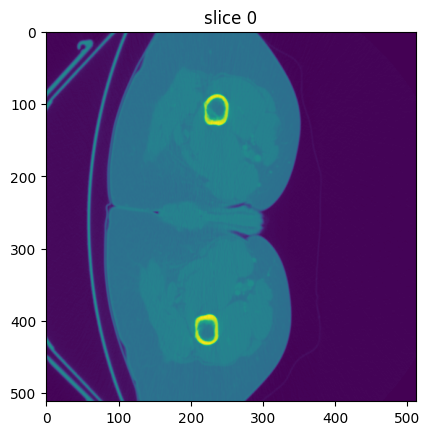

In [206]:

temparr = LoadImaged(keys=["image", "label"])(datalist[1])
print(temparr.keys())
print(temparr["image"].shape)
print(temparr["image_meta_dict"]["filename_or_obj"])
print(temparr["image"].max())
print(temparr["image"].min())
plt.imshow(temparr["image"][...,0])
plt.title('slice 0')

6
dict_keys(['image', 'label', 'image_meta_dict', 'label_meta_dict', 'foreground_start_coord', 'foreground_end_coord'])
torch.Size([1, 247, 223, 208])
data/segmentation/BTCV/Abdomen/RawData/imagesTr/img0002.nii.gz
[1.        0.7207031 0.7207031 3.        0.        0.        0.
 0.       ]
tensor(0.)
tensor(1.)


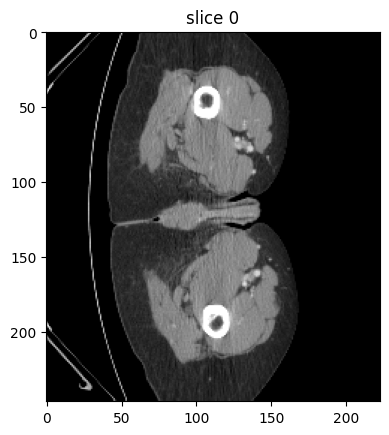

In [147]:
temparr1 = CropForegroundd(keys=["image", "label"], source_key="image")(
            ScaleIntensityRanged(
                keys=["image"],
                a_min=-175,
                a_max=250,
                b_min=0.0,
                b_max=1.0,
                clip=True,
            )(
            Spacingd(
                keys=["image", "label"],
                pixdim=(1.5, 1.5, 2.0),
                mode=("bilinear", "nearest"),
            )(
            Orientationd(keys=["image", "label"], axcodes="RAS")(
            EnsureChannelFirstd(keys=["image", "label"])(temparr)
            )
            )
            )
            )
if type(temparr1)!=type(list):
    print(len(temparr1))
    print(temparr1.keys())
    print(temparr1["image"].shape)
    print(temparr1["image_meta_dict"]["filename_or_obj"])
    print(temparr1["image_meta_dict"]["pixdim"])
    print(temparr1["image"].min())
    print(temparr1["image"].max())
    plt.imshow(temparr1["image"][...,0].squeeze(),cmap="gray")
    plt.title("slice 0")
else:
    print(len(temparr1))
    for i in range(len(temparr1)):
        print(temparr1[i].keys())
        print(temparr1[i]["image"].shape)
        print(temparr1[i]["image_meta_dict"]["filename_or_obj"])
        print(temparr1[i]["image_meta_dict"]["pixdim"])
        print(temparr1[i]["image"].min())
        print(temparr1[i]["image"].max())
        plt.imshow(temparr1[i]["image"][...,0].squeeze(), cmap="gray")
        plt.title("slice 0")
        plt.show()
        print("#"*100)

4
6
dict_keys(['image', 'label', 'image_meta_dict', 'label_meta_dict', 'foreground_start_coord', 'foreground_end_coord'])
torch.Size([1, 96, 96, 96])
data/segmentation/BTCV/Abdomen/RawData/imagesTr/img0002.nii.gz
[1.        0.7207031 0.7207031 3.        0.        0.        0.
 0.       ]
tensor(0.)
tensor(1.)


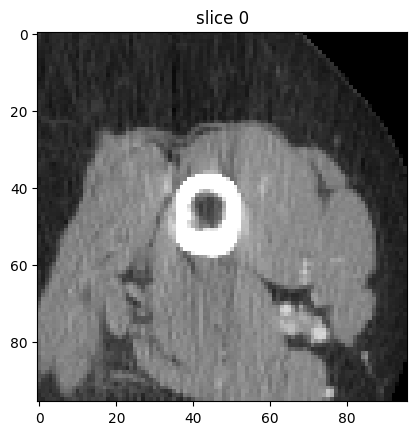

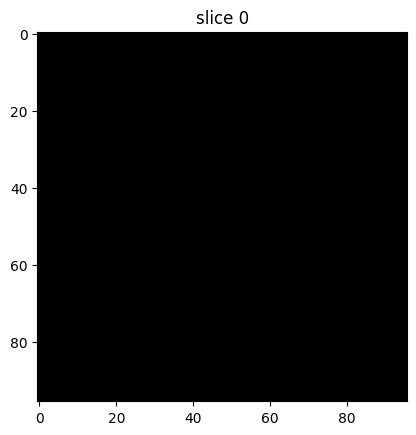

####################################################################################################
dict_keys(['image', 'label', 'image_meta_dict', 'label_meta_dict', 'foreground_start_coord', 'foreground_end_coord'])
torch.Size([1, 96, 96, 96])
data/segmentation/BTCV/Abdomen/RawData/imagesTr/img0002.nii.gz
[1.        0.7207031 0.7207031 3.        0.        0.        0.
 0.       ]
tensor(0.)
tensor(1.)


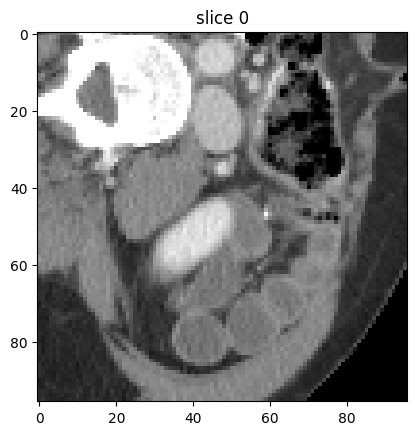

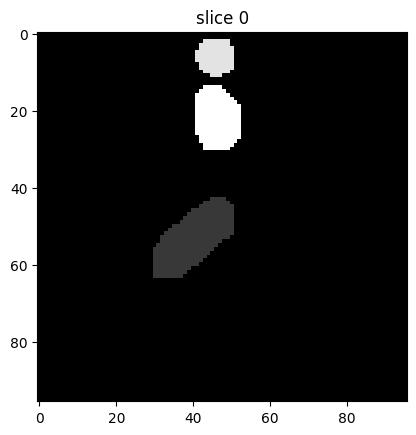

####################################################################################################
dict_keys(['image', 'label', 'image_meta_dict', 'label_meta_dict', 'foreground_start_coord', 'foreground_end_coord'])
torch.Size([1, 96, 96, 96])
data/segmentation/BTCV/Abdomen/RawData/imagesTr/img0002.nii.gz
[1.        0.7207031 0.7207031 3.        0.        0.        0.
 0.       ]
tensor(0.)
tensor(1.)


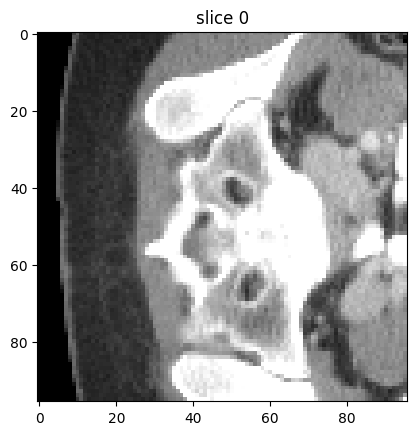

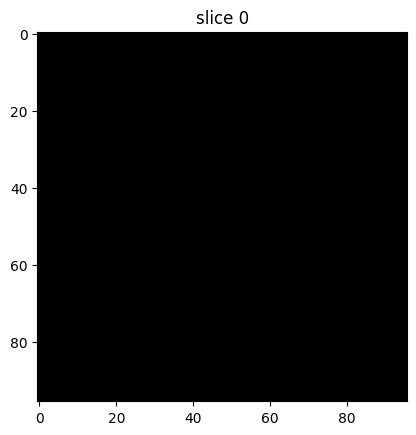

####################################################################################################
dict_keys(['image', 'label', 'image_meta_dict', 'label_meta_dict', 'foreground_start_coord', 'foreground_end_coord'])
torch.Size([1, 96, 96, 96])
data/segmentation/BTCV/Abdomen/RawData/imagesTr/img0002.nii.gz
[1.        0.7207031 0.7207031 3.        0.        0.        0.
 0.       ]
tensor(0.)
tensor(1.)


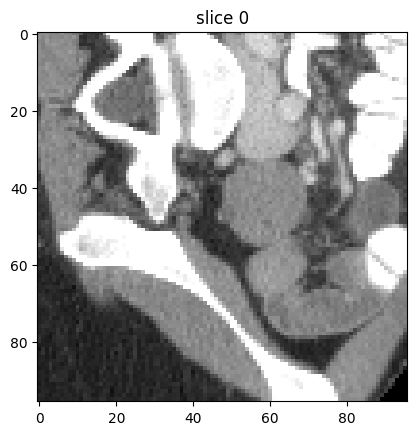

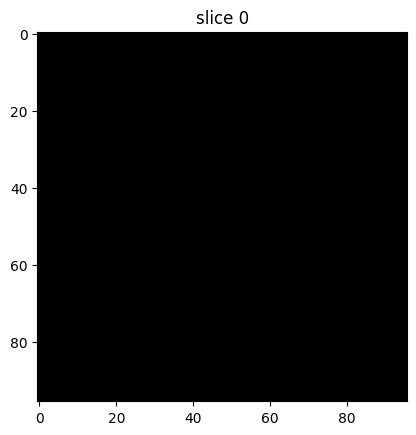

####################################################################################################


In [166]:
temparr1 = RandCropByPosNegLabeld(
                keys=["image", "label"],
                label_key="label",
                spatial_size=(96, 96, 96),
                pos=1,
                neg=1,
                num_samples=4,
                image_key="image",
                image_threshold=0,
            )(CropForegroundd(keys=["image", "label"], source_key="image")(
            ScaleIntensityRanged(
                keys=["image"],
                a_min=-175,
                a_max=250,
                b_min=0.0,
                b_max=1.0,
                clip=True,
            )(
            Spacingd(
                keys=["image", "label"],
                pixdim=(1.5, 1.5, 2.0),
                mode=("bilinear", "nearest"),
            )(
            Orientationd(keys=["image", "label"], axcodes="RAS")(
            EnsureChannelFirstd(keys=["image", "label"])(temparr)
            )
            )
            )
            )
            )
if type(temparr1)!=type(list):
    print(len(temparr1))
    print(temparr1.keys())
    print(temparr1["image"].shape)
    print(temparr1["image_meta_dict"]["filename_or_obj"])
    print(temparr1["image_meta_dict"]["pixdim"])
    print(temparr1["image"].min())
    print(temparr1["image"].max())
    plt.imshow(temparr1["image"][...,0].squeeze(), cmap="gray")
    plt.title("slice 0")
else:
    print(len(temparr1))
    print(len(temparr1[0]))
    for i in range(len(temparr1)):
        print(temparr1[i].keys())
        print(temparr1[i]["image"].shape)
        print(temparr1[i]["image_meta_dict"]["filename_or_obj"])
        print(temparr1[i]["image_meta_dict"]["pixdim"])
        print(temparr1[i]["image"].min())
        print(temparr1[i]["image"].max())
        plt.imshow(temparr1[i]["image"][...,0].squeeze(), cmap="gray")
        plt.title("slice 0")
        plt.show()
        plt.imshow(temparr1[i]["label"][...,0].squeeze(), cmap="gray")
        plt.title("slice 0")
        plt.show()
        print("#"*100)

In [192]:
temparr1[0]["image"].shape

torch.Size([1, 96, 96, 96])

6
dict_keys(['image', 'label', 'image_meta_dict', 'label_meta_dict', 'foreground_start_coord', 'foreground_end_coord'])
torch.Size([1, 96, 96, 96])
data/segmentation/BTCV/Abdomen/RawData/imagesTr/img0002.nii.gz
[1.        0.7207031 0.7207031 3.        0.        0.        0.
 0.       ]
tensor(-0.0623)
tensor(0.9377)


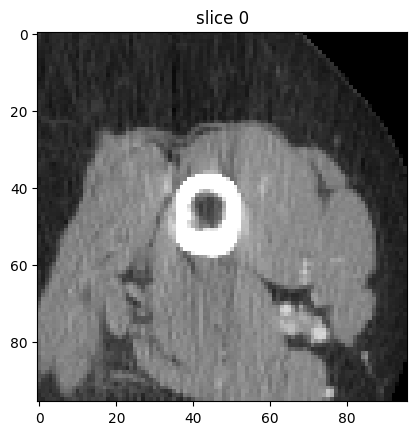

In [204]:
temparr
temparr2 =  RandShiftIntensityd(
                keys=["image", "label"],
                offsets=0.1,
                prob=1.0
            )(temparr1[0])

# temparr2 = temparr1[0]

if type(temparr2)!=type(list):
    print(len(temparr2))
    print(temparr2.keys())
    print(temparr2["image"].shape)
    print(temparr2["image_meta_dict"]["filename_or_obj"])
    print(temparr2["image_meta_dict"]["pixdim"])
    print(temparr2["image"].min())
    print(temparr2["image"].max())
    plt.imshow(temparr2["image"][...,0].squeeze(), cmap="gray")
    plt.title("slice 0")
else:
    print(len(temparr2))
    print(len(temparr2[0]))
    for i in range(len(temparr2)):
        print(temparr2[i].keys())
        print(temparr2[i]["image"].shape)
        print(temparr2[i]["image_meta_dict"]["filename_or_obj"])
        print(temparr2[i]["image_meta_dict"]["pixdim"])
        print(temparr2[i]["image"].min())
        print(temparr2[i]["image"].max())
        plt.imshow(temparr2[i]["image"][...,0].squeeze(), cmap="gray")
        plt.title("slice 0")
        plt.show()
        plt.imshow(temparr2[i]["label"][...,0].squeeze(), cmap="gray")
        plt.title("slice 0")
        plt.show()
        print("#"*100)

In [137]:
from typing import List
print(type(temparr1))
print(type(list))
if type(temparr1)==type(list):
    print("treu")
else:
    print("asldkjf")

<class 'list'>
<class 'list'>
treu


In [167]:
for i in range(30):
    plt.imshow(temparr1[0]["image"].squeeze()[:,i,:])
    plt.show()
    plt.imshow(temparr1[0]["label"].squeeze()[:,i,:])
    plt.show()


# # print(temparr1[0]["image"].shape)
# # print(temparr1[0]["label"].shape)

In [17]:
import warnings
warnings.filterwarnings("ignore")

data_dir = "./data/segmentation/BTCV/Abdomen/RawData/"
split_JSON = "dataset_0.json"
datasets = data_dir + split_JSON

datalist = load_decathlon_datalist(datasets, True, "training")
val_files = load_decathlon_datalist(datasets, True, "validation")

train_ds = CacheDataset(
    data=datalist,
    transform=train_transforms,
    cache_num=24,
    cache_rate=1.0,
    num_workers=8,
)
train_loader = DataLoader(train_ds, batch_size=1, shuffle=True, num_workers=4)

val_ds = CacheDataset(
    data=val_files, 
    transform=val_transforms,
    cache_num=6, 
    cache_rate=1.0, 
    num_workers=4
)
val_loader = DataLoader(val_ds, batch_size=1, shuffle=False, num_workers=4)

Loading dataset:   0%|          | 0/24 [00:00<?, ?it/s]pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:13,568 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:13,571 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:13,572 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:13,573 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:13,575 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:13,580 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:13,633 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:13,636 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:17,186 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:17,285 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:17,857 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:17,915 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:18,148 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:18,452 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:19,023 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:21,643 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:24,236 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:25,526 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:25,883 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:27,469 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


Loading dataset:   4%|▍         | 1/24 [00:14<05:35, 14.59s/it]pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:28,165 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:29,067 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:29,227 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:30,574 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:31,029 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:31,820 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:31,969 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:32,480 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:32,881 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


Loading dataset:  12%|█▎        | 3/24 [00:20<02:04,  5.93s/it]pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:33,964 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:34,336 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:37,338 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:38,838 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:38,964 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:40,328 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:40,434 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:40,740 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:43,164 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:43,844 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


Loading dataset:  38%|███▊      | 9/24 [00:30<00:40,  2.70s/it]pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:44,061 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


Loading dataset:  42%|████▏     | 10/24 [00:30<00:32,  2.35s/it]pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:44,435 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:45,843 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:47,642 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:48,032 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:48,315 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


Loading dataset:  75%|███████▌  | 18/24 [00:35<00:07,  1.18s/it]pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:50,020 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:51,462 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


Loading dataset:  79%|███████▉  | 19/24 [00:38<00:06,  1.37s/it]pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:41:53,219 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


Loading dataset:   0%|          | 0/6 [00:00<?, ?it/s]pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:42:00,679 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:42:00,679 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:42:00,680 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:42:00,772 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:42:02,232 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:42:02,471 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:42:02,728 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:42:05,334 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:42:08,000 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


Loading dataset:  17%|█▋        | 1/6 [00:08<00:44,  8.89s/it]pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:42:09,581 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:42:10,235 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


Loading dataset:  33%|███▎      | 2/6 [00:12<00:23,  5.88s/it]pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2023-01-04 11:42:13,606 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


Loading dataset: 100%|██████████| 6/6 [00:18<00:00,  3.05s/it]


In [176]:
type(train_ds[0])
from torch.utils.data import DataLoader as torchloader
temp_loader = torchloader(train_ds, batch_size=1)
for batch in temp_loader:
    print(type(batch))
    print(len(batch))
    print(type(batch[0]))
    break

<class 'list'>
4
<class 'dict'>


In [170]:
for batch in train_loader:
    print(len(batch))
    print(batch["image_meta_dict"])
    print()
    break

6
{'sizeof_hdr': tensor([348, 348, 348, 348], dtype=torch.int32), 'extents': tensor([0, 0, 0, 0], dtype=torch.int32), 'session_error': tensor([0, 0, 0, 0], dtype=torch.int16), 'dim_info': tensor([0, 0, 0, 0], dtype=torch.uint8), 'dim': tensor([[  3, 512, 512,  89,   1,   1,   1,   1],
        [  3, 512, 512,  89,   1,   1,   1,   1],
        [  3, 512, 512,  89,   1,   1,   1,   1],
        [  3, 512, 512,  89,   1,   1,   1,   1]], dtype=torch.int16), 'intent_p1': tensor([0., 0., 0., 0.]), 'intent_p2': tensor([0., 0., 0., 0.]), 'intent_p3': tensor([0., 0., 0., 0.]), 'intent_code': tensor([0, 0, 0, 0], dtype=torch.int16), 'datatype': tensor([4, 4, 4, 4], dtype=torch.int16), 'bitpix': tensor([16, 16, 16, 16], dtype=torch.int16), 'slice_start': tensor([0, 0, 0, 0], dtype=torch.int16), 'pixdim': tensor([[1.0000, 0.7969, 0.7969, 5.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.0000, 0.7969, 0.7969, 5.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.0000, 0.7969, 0.7969, 5.0000, 0.0000,

In [47]:
import torch
model = UNETR(
    in_channels=1,
    out_channels=14,
    img_size=(32, 32, 32),
    feature_size=16,
    hidden_size=768,
    mlp_dim=3072,
    num_heads=12,
    pos_embed="perceptron",
    norm_name="instance",
    res_block=True,
    dropout_rate=0.0,
)

x = torch.randn((4,1,32,32,32))
print(model(x).shape)

torch.Size([4, 14, 32, 32, 32])


data/segmentation/BTCV/Abdomen/RawData/imagesTr/img0039.nii.gz
image shape: torch.Size([1, 333, 228, 224]), label shape: torch.Size([1, 333, 228, 224])
slice num:  204
displayed image shape:  torch.Size([333, 228])
displayed label shape:  torch.Size([333, 228])


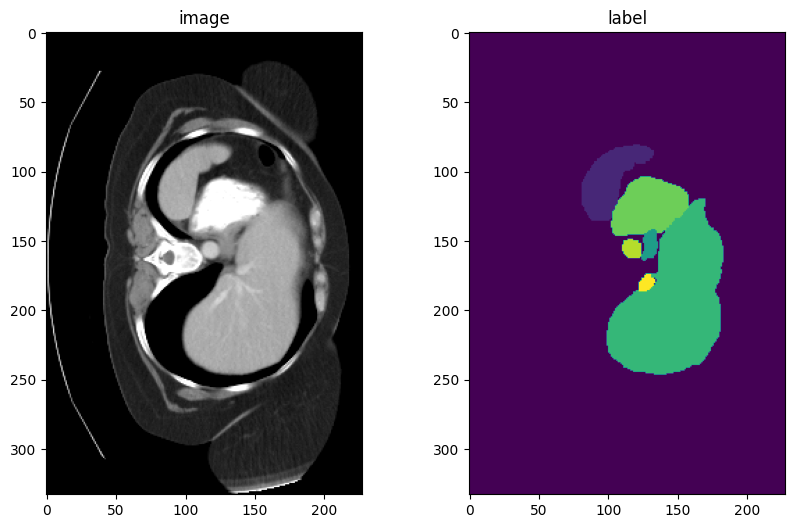

In [16]:
slice_map = {
    "img0035.nii.gz": 170,
    "img0036.nii.gz": 230,
    "img0037.nii.gz": 204,
    "img0038.nii.gz": 204,
    "img0039.nii.gz": 204,
    "img0040.nii.gz": 180,
}
case_num = 4
print(val_ds[case_num]["image"].meta["filename_or_obj"])
img_name = os.path.split(val_ds[case_num]["image"].meta["filename_or_obj"])[1]
img = val_ds[case_num]["image"]
label = val_ds[case_num]["label"]
img_shape = img.shape
label_shape = label.shape

temp_img = img[0, :, :, slice_map[img_name]].detach().cpu()
temp_label = label[0, :, :, slice_map[img_name]].detach().cpu()

print(f"image shape: {img_shape}, label shape: {label_shape}")
print("slice num: ",slice_map[img_name])
print("displayed image shape: ",temp_img.shape)
print("displayed label shape: ",temp_label.shape)

plt.figure("image", (10,6))

plt.subplot(1, 2, 1)
plt.title("image")
plt.imshow(temp_img, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("label")
plt.imshow(temp_label)

plt.show()

In [282]:
train_ds[0][0]["label"].shape

torch.Size([1, 96, 96, 96])

In [247]:
temp = {'avg_dice_score': 0.06007813289761543, 'train_loss': torch.tensor(2.9050, device='cuda:1')}
print(temp)

maplist = tuple(
    map(lambda x: (x[0],x[1].item()) if type(x[1])==type(torch.tensor) else (x[0],x[1]),
    zip(temp.keys(),temp.values()))
)

{'avg_dice_score': 0.06007813289761543, 'train_loss': tensor(2.9050, device='cuda:1')}


In [ ]:
dic = {}
for i in range(len(temp_label)):
    for j in range(len(temp_label[0])):
        if temp_label[i,j].item() != 0.:
            # print(int(temp_label[i,j].item()))
            dic[int(temp_label[i,j].item())] = 1
            # dic[temp_label[i,j].item()] = 1

In [ ]:
print("segemnted classes on above label image")
for elem in dic:
    print(elem,end=", ")
print(len(dic))

segemnted classes on above label image
1, 3, 7, 11, 8, 9, 2, 6, 8


In [54]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
local_rank = 1
device = torch.device(f"cuda:{local_rank}" if torch.cuda.is_available() else "cpu")

model = UNETR(
    in_channels=1,
    out_channels=14,
    img_size=(96, 96, 96),
    feature_size=16,
    hidden_size=768,
    mlp_dim=3072,
    num_heads=12,
    pos_embed="perceptron",
    norm_name="instance",
    res_block=True,
    dropout_rate=0.0,
).to(device)

loss_function = DiceCELoss(to_onehot_y=True, softmax=True)
torch.backends.cudnn.benchmark = True
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)

In [11]:
print(root_dir)

/tmp/tmp66vjt_5z


In [55]:
def validation(epoch_iterator_val):
    model.eval()
    with torch.no_grad():
        for step, batch in enumerate(epoch_iterator_val):
            val_inputs, val_labels = (batch["image"].to(device), batch["label"].to(device))
            # print("image shape: ", val_inputs.shape)
            # print("label shape: ", val_labels.shape)
            val_outputs = sliding_window_inference(val_inputs, (96, 96, 96), 4, model)
            val_labels_list = decollate_batch(val_labels)
            val_labels_convert = [
                post_label(val_label_tensor) for val_label_tensor in val_labels_list
            ]
            val_outputs_list = decollate_batch(val_outputs)
            val_output_convert = [
                post_pred(val_pred_tensor) for val_pred_tensor in val_outputs_list
            ]
            dice_metric(y_pred=val_output_convert, y=val_labels_convert)
            epoch_iterator_val.set_description(
                "Validate (%d / %d Steps)" % (global_step, 10.0)
            )
        mean_dice_val = dice_metric.aggregate().item()
        dice_metric.reset()
    return mean_dice_val


def train(global_step, train_loader, dice_val_best, global_step_best):
    model.train()
    epoch_loss = 0
    step = 0
    epoch_iterator = tqdm(
        train_loader, desc="Training (X / X Steps) (loss=X.X)", dynamic_ncols=True
    )
    for step, batch in enumerate(epoch_iterator):
        step += 1
        x, y = (batch["image"].to(device), batch["label"].to(device))
        print("image shape: ", x.shape)
        print("lable shape: ", y.shape)
        logit_map = model(x)
        print("outputs: ", logit_map.shape)
        loss = loss_function(logit_map, y)
        loss.backward()
        epoch_loss += loss.item()
        optimizer.step()
        optimizer.zero_grad()
        epoch_iterator.set_description(
            "Training (%d / %d Steps) (loss=%2.5f)" % (global_step, max_iterations, loss)
        )
        if (
            global_step % eval_num == 0 and global_step != 0
        ) or global_step == max_iterations:
            epoch_iterator_val = tqdm(
                val_loader, desc="Validate (X / X Steps) (dice=X.X)", dynamic_ncols=True
            )
            dice_val = validation(epoch_iterator_val)
            epoch_loss /= step
            # epoch_loss_values.append(epoch_loss)
            # metric_values.append(dice_val)
            if dice_val > dice_val_best:
                dice_val_best = dice_val
                global_step_best = global_step
                torch.save(
                    model.state_dict(), os.path.join(root_dir, "best_metric_model.pth")
                )
                print(
                    "Model Was Saved ! Current Best Avg. Dice: {} Current Avg. Dice: {}".format(
                        dice_val_best, dice_val
                    )
                )
            else:
                print(
                    "Model Was Not Saved ! Current Best Avg. Dice: {} Current Avg. Dice: {}".format(
                        dice_val_best, dice_val
                    )
                )
        global_step += 1
    return global_step, dice_val_best, global_step_best



root_dir = "./"
max_iterations = 25000
eval_num = max_iterations//5
post_label = AsDiscrete(to_onehot=14)
post_pred = AsDiscrete(argmax=True, to_onehot=14)
dice_metric = DiceMetric(include_background=True, reduction="mean", get_not_nans=False)
global_step = 1
dice_val_best = 0.0
global_step_best = 0
epoch_loss_values = []
metric_values = []
while global_step < max_iterations:
    # print(global_step)
    # print(max_iterations)
    global_step, dice_val_best, global_step_best = train(
        global_step, train_loader, dice_val_best, global_step_best
    )
model.load_state_dict(torch.load(os.path.join(root_dir, "best_metric_model.pth")))

Training (X / X Steps) (loss=X.X):   0%|          | 0/24 [00:00<?, ?it/s]

image shape:  torch.Size([4, 1, 96, 96, 96])
lable shape:  torch.Size([4, 1, 96, 96, 96])


Training (X / X Steps) (loss=X.X):   0%|          | 0/24 [00:10<?, ?it/s]


KeyboardInterrupt: 

In [31]:
print(len(metric_values))
print(len(epoch_loss_values))

6
6


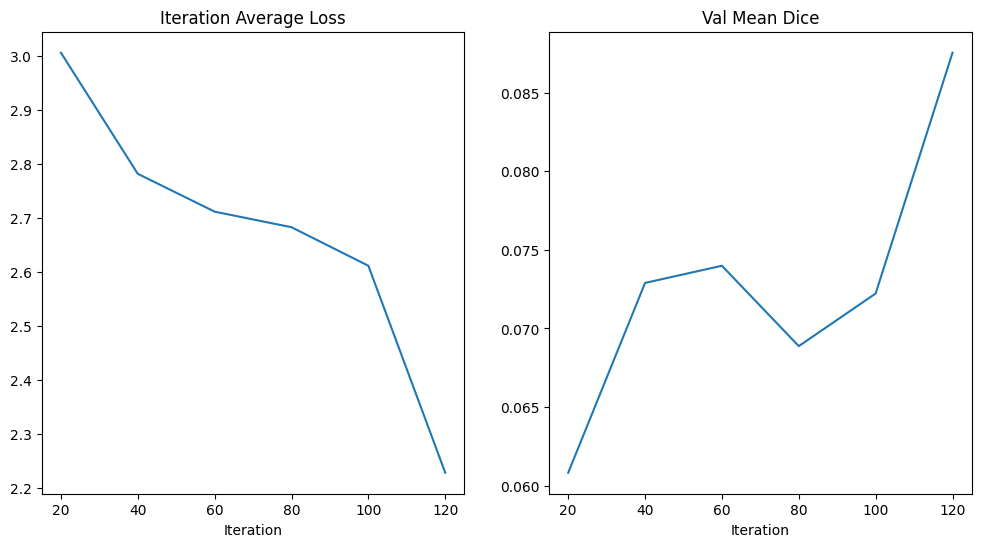

In [29]:
plt.figure("train", (12, 6))
plt.subplot(1, 2, 1)
plt.title("Iteration Average Loss")
x = [eval_num * (i + 1) for i in range(len(epoch_loss_values))]
y = epoch_loss_values
plt.xlabel("Iteration")
plt.plot(x, y)
plt.subplot(1, 2, 2)
plt.title("Val Mean Dice")
x = [eval_num * (i + 1) for i in range(len(metric_values))]
y = metric_values
plt.xlabel("Iteration")
plt.plot(x, y)
plt.show()

img0039.nii.gz


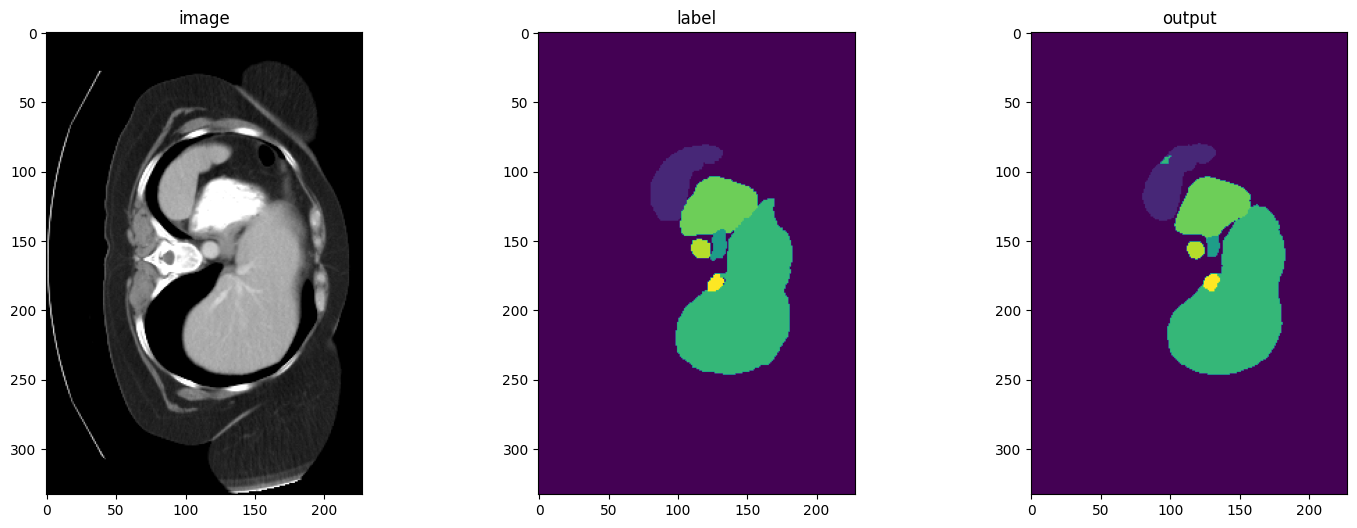

In [17]:
device = "cuda:1"
slice_map = {
    "img0035.nii.gz": 170,
    "img0036.nii.gz": 230,
    "img0037.nii.gz": 204,
    "img0038.nii.gz": 204,
    "img0039.nii.gz": 204,
    "img0040.nii.gz": 180,
}

model = UNETR(
    in_channels=1,
    out_channels=14,
    img_size=(96, 96, 96),
    feature_size=16,
    hidden_size=768,
    mlp_dim=3072,
    num_heads=12,
    pos_embed="perceptron",
    norm_name="instance",
    res_block=True,
    dropout_rate=0.0,
).to(device)


model.load_state_dict(torch.load(os.path.join(root_dir, "best_metric_model.pth")))
model.eval()

root_dir = "./"
case_num = 4
with torch.no_grad():
    img_name = os.path.split(val_ds[case_num]["image"].meta["filename_or_obj"])[1]
    img = val_ds[case_num]["image"]
    label = val_ds[case_num]["label"]
    val_inputs = torch.unsqueeze(img, 1).to(device)
    val_labels = torch.unsqueeze(label, 1).to(device)
    val_outputs = sliding_window_inference(
        val_inputs, (96, 96, 96), 4, model, overlap=0.8
    )
    print(img_name)
    plt.figure("check", (18, 6))
    plt.subplot(1, 3, 1)
    plt.title("image")
    plt.imshow(val_inputs.cpu().numpy()[0, 0, :, :, slice_map[img_name]], cmap="gray")
    plt.subplot(1, 3, 2)
    plt.title("label")
    plt.imshow(val_labels.cpu().numpy()[0, 0, :, :, slice_map[img_name]])
    plt.subplot(1, 3, 3)
    plt.title("output")
    plt.imshow(
        torch.argmax(val_outputs, dim=1).detach().cpu()[0, :, :, slice_map[img_name]]
    )
    plt.show()

img0038.nii.gz


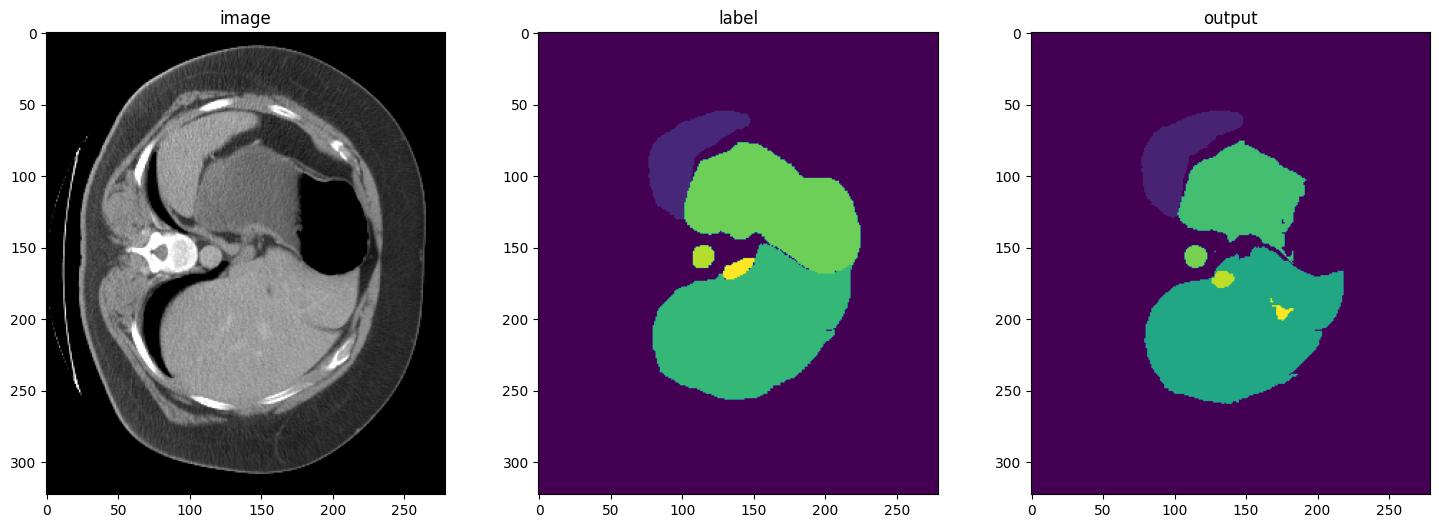

In [18]:
root_dir = "./"
case_num = 3
with torch.no_grad():
    img_name = os.path.split(val_ds[case_num]["image"].meta["filename_or_obj"])[1]
    img = val_ds[case_num]["image"]
    label = val_ds[case_num]["label"]
    val_inputs = torch.unsqueeze(img, 1).to(device)
    val_labels = torch.unsqueeze(label, 1).to(device)
    val_outputs = sliding_window_inference(
        val_inputs, (96, 96, 96), 4, model, overlap=0.8
    )
    print(img_name)
    plt.figure("check", (18, 6))
    plt.subplot(1, 3, 1)
    plt.title("image")
    plt.imshow(val_inputs.cpu().numpy()[0, 0, :, :, slice_map[img_name]], cmap="gray")
    plt.subplot(1, 3, 2)
    plt.title("label")
    plt.imshow(val_labels.cpu().numpy()[0, 0, :, :, slice_map[img_name]])
    plt.subplot(1, 3, 3)
    plt.title("output")
    plt.imshow(
        torch.argmax(val_outputs, dim=1).detach().cpu()[0, :, :, slice_map[img_name]]
    )
    plt.show()

(333, 228, 3)


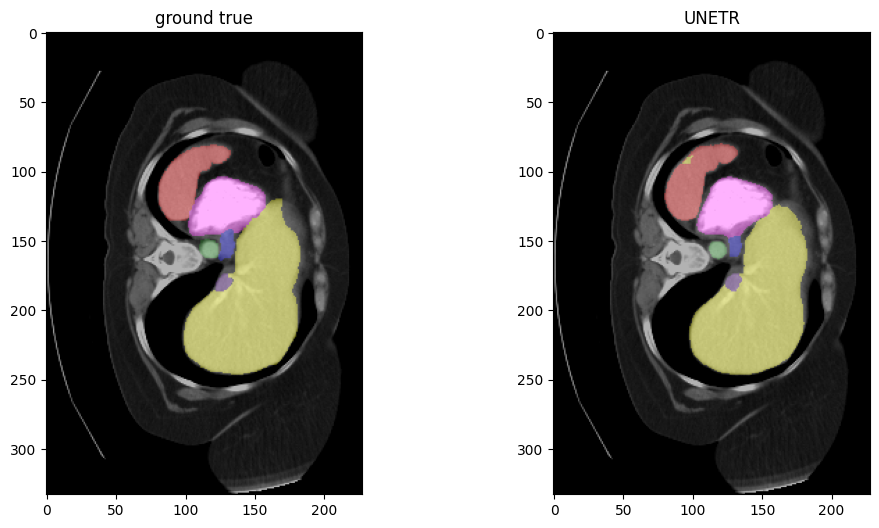

In [16]:
import cv2

plt.figure("check",(12,6))
overlayed_img = overlay(
    val_inputs.cpu().numpy()[0, 0, :, :, slice_map[img_name]],
    val_labels.cpu().numpy()[0, 0, :, :, slice_map[img_name]]
)
print(overlayed_img.shape)
plt.subplot(1,2,1)
plt.title("ground true")
plt.imshow(overlayed_img)

overlayed_img = overlay(
    val_inputs.cpu().numpy()[0, 0, :, :, slice_map[img_name]],
    torch.argmax(val_outputs, dim=1).detach().cpu().numpy()[0, :, :, slice_map[img_name]]
)
plt.subplot(1,2,2)
plt.title("UNETR")
plt.imshow(overlayed_img)

plt.show()

In [28]:
print(val_labels.shape)
print()
print(val_outputs.shape)
print(torch.argmax(val_outputs, dim=1).shape)
print(torch.argmax(val_outputs, dim=1)[0,0,0,0])
print()
v, a = torch.max(val_outputs, dim=1)
print(v.shape)
print(v[0,0,0,0])
print()
print(a.shape)
print(a[0,0,0,0])

torch.Size([1, 1, 333, 228, 224])

torch.Size([1, 14, 333, 228, 224])
torch.Size([1, 333, 228, 224])
tensor(0, device='cuda:1')

torch.Size([1, 333, 228, 224])
tensor(1.5127, device='cuda:1')

torch.Size([1, 333, 228, 224])
tensor(0, device='cuda:1')


# Check

In [285]:
import torch

x = torch.randn((1,3,32,32))
print(torch.nn.ConvTranspose2d(3, 4, 3)(x).shape)

torch.Size([1, 4, 34, 34])


In [283]:
from monai.networks.nets import UNETR
model = UNETR(
    in_channels=1,
    out_channels=14,
    img_size=(96, 96, 96),
    feature_size=16,
    hidden_size=768,
    mlp_dim=3072,
    num_heads=12,
    pos_embed="perceptron",
    norm_name="instance",
    res_block=True,
    dropout_rate=0.0,
)
# model.load_state_dict(torch.load("./best_metric_model.pth"))
print(model)

UNETR(
  (vit): ViT(
    (patch_embedding): PatchEmbeddingBlock(
      (patch_embeddings): Sequential(
        (0): Rearrange('b c (h p1) (w p2) (d p3) -> b (h w d) (p1 p2 p3 c)', p1=16, p2=16, p3=16)
        (1): Linear(in_features=4096, out_features=768, bias=True)
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (blocks): ModuleList(
      (0): TransformerBlock(
        (mlp): MLPBlock(
          (linear1): Linear(in_features=768, out_features=3072, bias=True)
          (linear2): Linear(in_features=3072, out_features=768, bias=True)
          (fn): GELU(approximate=none)
          (drop1): Dropout(p=0.0, inplace=False)
          (drop2): Dropout(p=0.0, inplace=False)
        )
        (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): SABlock(
          (out_proj): Linear(in_features=768, out_features=768, bias=True)
          (qkv): Linear(in_features=768, out_features=2304, bias=False)
          (input_rearrange): Rearrange('b h (qkv l 

# Test

In [1]:
import torch
from torchvision import models

batchs = torch.randn((16,3,224,224))
model = models.segmentation.deeplabv3_resnet50()
outputs = model(batchs)
print(outputs["out"].shape)
# print(model)

torch.Size([16, 21, 224, 224])


In [2]:

model = models.vit_b_16()
print(model)
model

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate=none)
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_att

In [5]:
import torch
from monai.networks.nets import SegResNet

model = SegResNet(
    blocks_down=[1,2,2,4],
    blocks_up=[1,1,1],
    init_filters=16,
    in_channels=4,
    out_channels=3,
    dropout_prob=0.2
)

inputs = torch.randn((6,4,96,96,96))
print(model(inputs).shape)

torch.Size([6, 3, 96, 96, 96])


In [4]:
import torch
from monai.networks.nets import UNet


net = UNet(
    spatial_dims=3,
    in_channels=1,
    out_channels=1,
    channels=(4, 8, 16),
    strides=(2, 2),
    num_res_units=2
)
print(net)

UNet(
  (model): Sequential(
    (0): ResidualUnit(
      (conv): Sequential(
        (unit0): Convolution(
          (conv): Conv3d(1, 4, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
          (adn): ADN(
            (N): InstanceNorm3d(4, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
        (unit1): Convolution(
          (conv): Conv3d(4, 4, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (adn): ADN(
            (N): InstanceNorm3d(4, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
      )
      (residual): Conv3d(1, 4, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
    )
    (1): SkipConnection(
      (submodule): Sequential(
        (0): ResidualUnit(
          (conv): Sequenti

In [ ]:
import 

/home/ljj0512/.conda/envs/torch/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:728: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


0.0010110358533705688


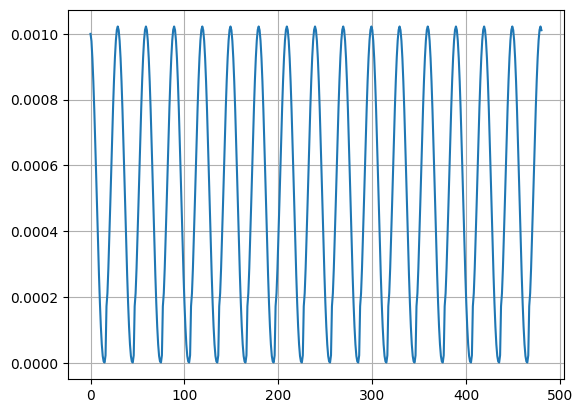

In [287]:
from torch.optim import SGD, AdamW, RMSprop
from torch.optim.lr_scheduler import CosineAnnealingLR, CosineAnnealingWarmRestarts, MultiStepLR, StepLR, SequentialLR

import torch.nn as nn

lr = 1e-3
epochs = 15
# warmup_epoch = 5
# warmup_lr = 4e-3

model = nn.Conv2d(3, 16, 3)
# optimizer = optim.Adam(model.parameters(), lr = 0)
optimizer = SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=1e-3)
scheduler = CosineAnnealingLR(optimizer, 15, 1e-6)

lr_list = [lr]
# warmup_iter = warmup_epoch * 32

# lr_lambda = lambda e: (e * (lr - warmup_lr) / warmup_iter + warmup_lr) / lr
# warmup_scheduler = LambdaLR(optimizer, lr_lambda=lr_lambda)

# scheduler = SequentialLR(optimizer, [warmup_scheduler, main_scheduler], [warmup_iter])

for i in range(epochs):
    for j in range(32):
        optimizer.step()
        temp = optimizer.state_dict()
        scheduler.step()
        lr_list.append(scheduler.get_lr()[0])
        # temp = optimizer.state_dict()
        # lr_list.append(temp['param_groups'][0]['lr'])
        # scheduler.step()
        # lr_list.append(scheduler.get_last_lr())
import matplotlib.pyplot as plt
plt.grid(True)
plt.plot(lr_list)
print(lr_list[-1])

In [2]:
import timm
model = timm.create_model("vit_base_patch16_224")
print(model)

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate=none)
        (drop1): Dropout(p=0.0, inplace=False)
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop2): Dropout(p=0.0, inplace=False)
      )
      (ls2): 

In [23]:
import torch
x = torch.randn((6,3,224,224))

y_hat = model.patch_embed.proj(x)
print(y_hat.shape)

y_hat = model.patch_embed(x)
print(y_hat.shape)

torch.Size([6, 768, 14, 14])
torch.Size([6, 196, 768])


In [24]:
y_hat = model.blocks[0](y_hat)
print(y_hat.shape)

torch.Size([6, 196, 768])


In [25]:
torch.nn.Linear(768, 13)(y_hat).shape

torch.Size([6, 196, 13])

In [26]:
model.head(y_hat).shape

torch.Size([6, 196, 1000])

In [27]:
model.forward_features(x).shape

torch.Size([6, 197, 768])

In [31]:
B = x.shape[0]
torch.cat((torch.randn((1,1,768)).expand(B, -1, -1), y_hat), dim=1).shape

torch.Size([6, 197, 768])

In [34]:
model.forward_head(y_hat).shape

torch.Size([6, 1000])

In [36]:
model.head(y_hat[:,0]).shape

torch.Size([6, 1000])

In [20]:
import numpy as np
import torch
x = torch.Tensor(np.arange(0,12*2*2).reshape(1,12,2,2))
print(x.shape)
print(x)
print()

pixel_shuffle = torch.nn.PixelShuffle(2)
output = pixel_shuffle(x)
print(output.shape)
print(output)

pixel_unshuffle = torch.nn.PixelUnshuffle(2)
output = pixel_unshuffle(output)
print(output.shape)
print(output)

# x = torch.Tensor([
#     [
#         [1,2],
#         [3,4]
#     ],
#     [
#         [5,6],
#         [7,8]
#     ],
# ])

torch.Size([1, 12, 2, 2])
tensor([[[[ 0.,  1.],
          [ 2.,  3.]],

         [[ 4.,  5.],
          [ 6.,  7.]],

         [[ 8.,  9.],
          [10., 11.]],

         [[12., 13.],
          [14., 15.]],

         [[16., 17.],
          [18., 19.]],

         [[20., 21.],
          [22., 23.]],

         [[24., 25.],
          [26., 27.]],

         [[28., 29.],
          [30., 31.]],

         [[32., 33.],
          [34., 35.]],

         [[36., 37.],
          [38., 39.]],

         [[40., 41.],
          [42., 43.]],

         [[44., 45.],
          [46., 47.]]]])

torch.Size([1, 3, 4, 4])
tensor([[[[ 0.,  4.,  1.,  5.],
          [ 8., 12.,  9., 13.],
          [ 2.,  6.,  3.,  7.],
          [10., 14., 11., 15.]],

         [[16., 20., 17., 21.],
          [24., 28., 25., 29.],
          [18., 22., 19., 23.],
          [26., 30., 27., 31.]],

         [[32., 36., 33., 37.],
          [40., 44., 41., 45.],
          [34., 38., 35., 39.],
          [42., 46., 43., 47.]]]])
torc